# Importing relevant libraries

In [1]:
import os, geopandas as gpd, mapclassify, numpy as np, pandas as pd


# Geoprojection of paralized projects

Importing relevant data

In [2]:

departamentos= gpd.read_file(os.path.join("maps", "Peru_departamental_simple", "Peru_departamental_simple.geojson"))
provincias= gpd.read_file(os.path.join("maps", "Peru_provincial_simple", "Peru_provincial_simple.geojson"))
obras_paralizadas= pd.read_excel(os.path.join("data","obras_paralizadas.xlsx"), header=3)

Treating the data

In [3]:
provlist= ['NOMBPROV','geometry']
collist=['Departamento', 'Provincia', 'Entidad Pública', 'Tipo de obra - Clasificador Nivel 1']

In [4]:
departamentos.drop(columns=['COUNT','FIRST_IDDP', 'HECTARES'], inplace=True)#removing irrelevant columns 
provincias= provincias.loc[:,provlist]

In [5]:
obras_paralizadas= obras_paralizadas.loc[:,collist] #keeping relevant columns 

In [6]:
obras_paralizadas.head()

,Departamento,Provincia,Entidad Pública,Tipo de obra - Clasificador Nivel 1
0,CUSCO,ACOMAYO,PROGRAMA NACIONAL PLATAFORMAS DE ACCION PARA L...,Vivienda Construccion Y Saneamiento
1,CUSCO,CANAS,PROGRAMA NACIONAL PLATAFORMAS DE ACCION PARA L...,Otras Infraestructuras
2,LA LIBERTAD,TRUJILLO,UNIVERSIDAD NACIONAL DE TRUJILLO,Educacion/Cultura
3,JUNIN,SATIPO,GOBIERNO REGIONAL JUNIN,Transportes Y Comunicaciones
4,ANCASH,HUARI,MUNICIPALIDAD DISTRITAL DE SAN MARCOS HUARI,Agricultura


Adding a new column for counting each row

In [7]:
obras_paralizadas= obras_paralizadas.assign(casos=1)

Groupby

In [8]:
obras_pordepartamento= obras_paralizadas.groupby(['Departamento'], observed= True).agg({'casos':['sum']})
obras_porprovincia= obras_paralizadas.groupby(['Provincia'], observed=True).agg({'casos': [sum]})

In [9]:
obras_pordepartamento.reset_index(inplace=True)
obras_porprovincia.reset_index(inplace=True)

In [10]:
obras_pordepartamento.head()

,Departamento,casos
,,sum
0,AMAZONAS,40
1,ANCASH,144
2,APURIMAC,113
3,AREQUIPA,90
4,AYACUCHO,129


In [11]:
obras_porprovincia.head()

,Provincia,casos
,,sum
0,ABANCAY,27
1,ACOBAMBA,7
2,ACOMAYO,10
3,AIJA,5
4,ALTO AMAZONAS,4


In [63]:
import matplotlib.pyplot as plt

Classification-1

In [12]:
np.random.seed(12345)
K=4
theVar= obras_pordepartamento.casos
q4=mapclassify.Quantiles(theVar,k=K)
ht4 = mapclassify.HeadTailBreaks(theVar) 
fj4 = mapclassify.FisherJenks(theVar, k=K)
jc4 = mapclassify.JenksCaspall(theVar, k=K)

In [13]:
class4= q4,ht4,fj4,jc4
punt=np.array([c.adcm for c in class4 ])
adcms= pd.DataFrame(punt)
adcms['classifier']= [c.name for c in class4]
adcms.columns= ['ADCMS','Classifier']

In [68]:
adcms

,ADCMS,Classifier
0,591.0,Quantiles
1,478.0,HeadTailBreaks
2,349.0,FisherJenks
3,558.0,JenksCaspall


<Axes: ylabel='Classifier'>

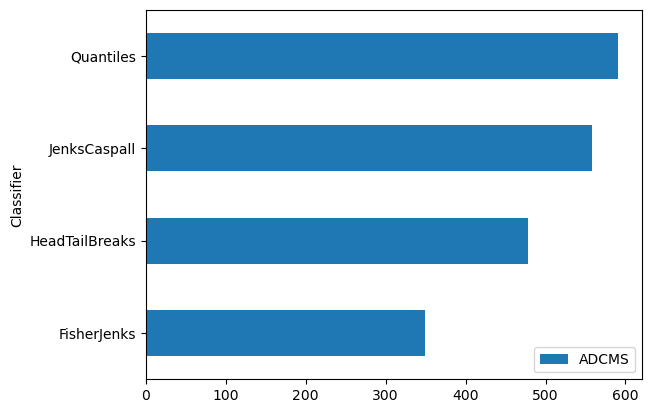

In [14]:
adcms.sort_values('ADCMS').plot.barh(x='Classifier')

In [15]:
obras_pordepartamento.loc[:,'Total_fj4']=fj4.yb
obras_pordepartamento.loc[:,'Total_ht4']= ht4.yb

Classification-2

In [16]:

theVar2= obras_porprovincia.casos
q41=mapclassify.Quantiles(theVar2,k=K)
ht41 = mapclassify.HeadTailBreaks(theVar2) 
fj41 = mapclassify.FisherJenks(theVar2, k=K)
jc41 = mapclassify.JenksCaspall(theVar2, k=K)


In [17]:
class42= q41, ht41, fj41, jc41
points2= np.array([c.adcm for c in class42])
adcm2=pd.DataFrame(points2)
adcm2['classifier2']=[c.name for c in class42]
adcm2.columns= ['ADCMS2','Classifier2']

In [18]:
adcm2

,ADCMS2,Classifier2
0,592.0,Quantiles
1,493.0,HeadTailBreaks
2,534.0,FisherJenks
3,445.0,JenksCaspall


<Axes: ylabel='Classifier2'>

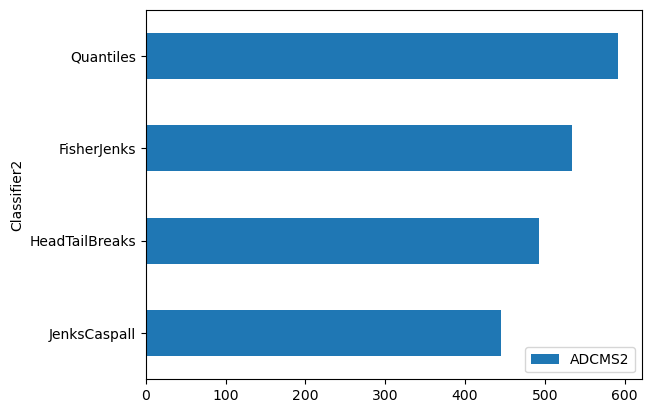

In [19]:
adcm2.sort_values('ADCMS2').plot.barh(x='Classifier2')

In [20]:
obras_porprovincia.loc[:,'Total_jc41']=jc41.yb
obras_porprovincia.loc[:,'Total_ht41']= ht41.yb

In [21]:
columlist1= ['Total_fj4','Total_ht4']
newcolnames1= [name+"_cat" for name in columlist1]
obras_pordepartamento[newcolnames1]=obras_pordepartamento.loc[:,columlist1]


In [22]:
columlist2= ['Total_jc41','Total_ht41']
newcolnames2= [name+"_cat" for name in columlist2]
obras_porprovincia[newcolnames2]=obras_porprovincia.loc[:,columlist2]

In [23]:
newlistraw={0:'0_great', 1: '1_good', 2: '2_middle', 3:'3_bad'}
obras_pordepartamento[newcolnames1]=obras_pordepartamento.loc[:,newcolnames1].replace(newlistraw)

In [24]:
obras_porprovincia[newcolnames2]=obras_porprovincia.loc[:,newcolnames2].replace(newlistraw)

In [25]:
departmentanddata= departamentos.merge(obras_pordepartamento)

In [30]:
onlydepartamento= set(departamentos.NOMBDEP) - set(obras_pordepartamento.Departamento)
onlyobras= set(obras_pordepartamento.Departamento) - set(departamentos.NOMBDEP)

In [31]:
onlydepartamento

{'CALLAO'}

In [33]:
departamentos.NOMBDEP.replace({'CALLAO':'P C DEL CALLAO'}, inplace=True)
onlydepartamento= set(departamentos.NOMBDEP) - set(obras_pordepartamento.Departamento)
onlyobras= set(obras_pordepartamento.Departamento) - set(departamentos.NOMBDEP)

In [38]:
obras_pordepartamento

,Departamento,casos,Total_fj4,Total_ht4,Total_fj4_cat,Total_ht4_cat
,,sum,,,,
0,AMAZONAS,40,0,0,0_great,0_great
1,ANCASH,144,2,1,2_middle,1_good
2,APURIMAC,113,2,1,2_middle,1_good
3,AREQUIPA,90,1,0,1_good,0_great
4,AYACUCHO,129,2,1,2_middle,1_good
5,CAJAMARCA,137,2,1,2_middle,1_good
6,CUSCO,346,3,3,3_bad,3_bad
7,HUANCAVELICA,90,1,0,1_good,0_great
8,HUANUCO,73,1,0,1_good,0_great


In [39]:
obras_pordepartamento.columns=["".join(name) for name in obras_pordepartamento.columns]

In [42]:
departamentosanddata= departamentos.merge(obras_pordepartamento, left_on='NOMBDEP', right_on= 'Departamento')

In [43]:
departamentosanddata

,NOMBDEP,geometry,Departamento,casossum,Total_fj4,Total_ht4,Total_fj4_cat,Total_ht4_cat
0,AMAZONAS,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",AMAZONAS,40,0,0,0_great,0_great
1,ANCASH,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",ANCASH,144,2,1,2_middle,1_good
2,APURIMAC,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",APURIMAC,113,2,1,2_middle,1_good
3,AREQUIPA,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",AREQUIPA,90,1,0,1_good,0_great
4,AYACUCHO,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",AYACUCHO,129,2,1,2_middle,1_good
5,CAJAMARCA,"POLYGON ((-79.32259 -7.02568, -79.29663 -6.999...",CAJAMARCA,137,2,1,2_middle,1_good
6,P C DEL CALLAO,"POLYGON ((-77.18710 -11.82836, -77.12605 -11.8...",P C DEL CALLAO,10,0,0,0_great,0_great
7,CUSCO,"POLYGON ((-72.47177 -14.66140, -72.46170 -14.6...",CUSCO,346,3,3,3_bad,3_bad
8,HUANCAVELICA,"POLYGON ((-75.05905 -14.12962, -75.10884 -14.0...",HUANCAVELICA,90,1,0,1_good,0_great
9,HUANUCO,"POLYGON ((-77.31749 -8.53015, -77.26408 -8.467...",HUANUCO,73,1,0,1_good,0_great


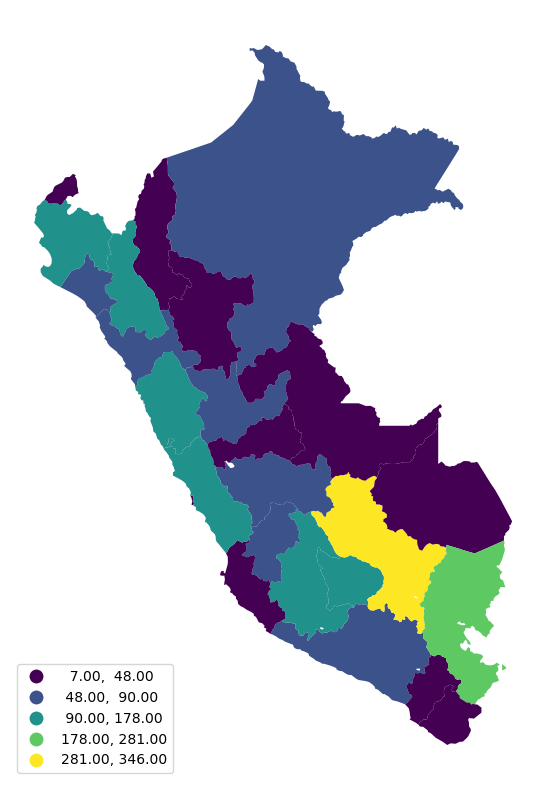

In [71]:
f, ax= plt.subplots(1, figsize=(10,10))
departamentosanddata.plot(column='casossum',
                            cmap='viridis',
                            scheme= 'FisherJenks',
                            edgecolor= 'white',
                            linewidth=0.,
                            alpha= 1,
                            legend= True,
                            legend_kwds={'loc':'lower left'},
                        ax=ax)
ax.set_axis_off()

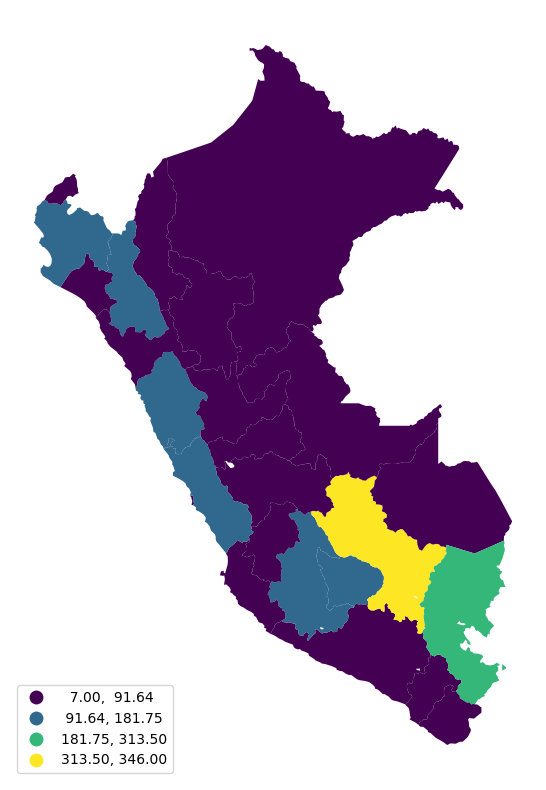

In [81]:
f,ax= plt.subplots(1, figsize=(10,10))
departamentosanddata.plot(column='casossum',
                            cmap='viridis',
                            scheme= 'HeadTailBreaks',
                            edgecolor='white',
                            linewidth=0.,
                            alpha=1,
                            legend=True,
                            legend_kwds={'loc':'lower left'},
                            ax=ax)
ax.set_axis_off()


In [48]:
departamentosanddata24891=departamentosanddata.to_crs(24891)

<Axes: >

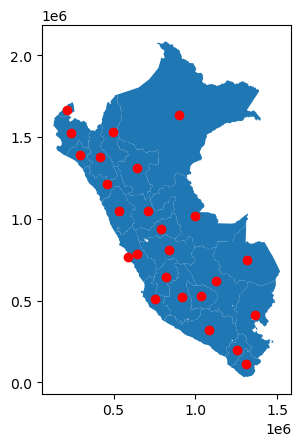

In [50]:
base24981= departamentosanddata24891.plot()
departamentosanddata24891.centroid.plot(color= "red", ax= base24981)

In [51]:
departamentosanddata24891.loc[:,'centroids']=departamentosanddata24891.centroid

In [54]:
centroidlist=['centroids', 'Total_fj4','Total_fj4_cat','Total_ht4', 'Total_ht4_cat']

In [55]:
centroidsdepartamento24891= departamentosanddata24891.loc[:,centroidlist]

In [56]:
centroidsdepartamento24891

,centroids,Total_fj4,Total_fj4_cat,Total_ht4,Total_ht4_cat
0,POINT (493476.097 1529742.627),0,0_great,0,0_great
1,POINT (533110.889 1049397.136),2,2_middle,1,1_good
2,POINT (1037213.403 526122.430),2,2_middle,1,1_good
3,POINT (1084468.376 321888.634),1,1_good,0,0_great
4,POINT (916109.005 523796.334),2,2_middle,1,1_good
5,POINT (416361.054 1379612.571),2,2_middle,1,1_good
6,POINT (589838.251 767804.542),0,0_great,0,0_great
7,POINT (1128010.361 617171.118),3,3_bad,3,3_bad
8,POINT (819260.534 643884.795),1,1_good,0,0_great
9,POINT (713189.280 1046084.919),1,1_good,0,0_great


In [57]:
centroidsdepartamento24891.set_geometry("centroids",inplace=True)

In [60]:
departamentosanddata24891.drop(columns=['centroids'], inplace= True)

In [61]:
departamentosanddata24891

,NOMBDEP,geometry,Departamento,casossum,Total_fj4,Total_ht4,Total_fj4_cat,Total_ht4_cat
0,AMAZONAS,"POLYGON ((525209.037 1319690.150, 515586.540 1...",AMAZONAS,40,0,0,0_great,0_great
1,ANCASH,"POLYGON ((572747.693 1145999.944, 575830.449 1...",ANCASH,144,2,1,2_middle,1_good
2,APURIMAC,"POLYGON ((1089393.556 453861.718, 1077837.183 ...",APURIMAC,113,2,1,2_middle,1_good
3,AREQUIPA,"POLYGON ((805335.784 375477.263, 807909.957 37...",AREQUIPA,90,1,0,1_good,0_great
4,AYACUCHO,"POLYGON ((893088.852 736870.955, 895579.762 73...",AYACUCHO,129,2,1,2_middle,1_good
5,CAJAMARCA,"POLYGON ((352326.199 1313641.127, 355201.054 1...",CAJAMARCA,137,2,1,2_middle,1_good
6,P C DEL CALLAO,"POLYGON ((583387.295 780546.874, 590059.457 78...",P C DEL CALLAO,10,0,0,0_great,0_great
7,CUSCO,"POLYGON ((1089393.556 453861.718, 1090708.777 ...",CUSCO,346,3,3,3_bad,3_bad
8,HUANCAVELICA,"POLYGON ((810418.932 521306.549, 805268.834 53...",HUANCAVELICA,90,1,0,1_good,0_great
9,HUANUCO,"POLYGON ((572747.693 1145999.944, 578693.635 1...",HUANUCO,73,1,0,1_good,0_great


Saving the files

In [62]:
departamentosanddata24891.to_file(os.path.join("maps","perudepartamentos24891.gpkg"), layer= "departamentos", driver= "GPKG")
centroidsdepartamento24891.to_file(os.path.join("maps", "perudepartamentos24891.gpkg"), layer= "centroids", driver= "GPKG")